In [3]:
path = "C:\\Users\zdc\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\\versions\\2"

import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import scipy
import pandas

# 数据集路径（假设你将数据集放在当前目录的'chest_xray'文件夹中）
train_dir = os.path.join(path, 'chest_xray', 'train')
test_dir = os.path.join(path, 'chest_xray', 'test')
eval_dir = os.path.join(path, 'chest_xray', 'val')
print(train_dir)

C:\Users\zdc\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2\chest_xray\train


In [4]:
# 图像预处理
train_datagen = ImageDataGenerator(
    rescale=1./255,#将图像像素值进行缩放
    rotation_range=40,#随机旋转图片
    width_shift_range=0.2,#随机平移图片
    height_shift_range=0.2,#随机平移图片
    shear_range=0.2,#对图像剪切变换
    zoom_range=0.2,#随机缩放图像
    horizontal_flip=True,#对图像水平翻转
    fill_mode='nearest'#就近填充翻转后空白区域
)

eval_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 加载训练数据
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,#每次从目录中读取32张
    class_mode='binary',#任务类型
    target_size=(150, 150)#图像大小
)

# 加载测试数据
test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    class_mode='binary',
    target_size=(150, 150)
)

# 加载验证数据（val文件夹）
eval_generator = eval_datagen.flow_from_directory(
    eval_dir,
    batch_size=32,
    class_mode='binary',
    target_size=(150, 150)
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [22]:
# model 1
# def create_model_1():
#     # 简单的CNN模型
#     model = models.Sequential([
#         #卷积层，提取图像局部特征
#         layers.Conv2D(32, (5, 5), activation='relu', input_shape=(150, 150, 3)),#过滤器数量64，卷积核大小3*3，激活函数RELU，输入图像的大小150*150*3通道
#         layers.MaxPooling2D((3, 3)),#池化层，缩小特征图尺寸，保留重要特征
#         layers.Conv2D(64, (3, 3), activation='relu'),
#         layers.MaxPooling2D((3, 3)),
#         layers.Flatten(),
#         layers.Dense(128, activation='relu'),#全连接层，综合所有特征，完成分类或回归
#         layers.Dense(1, activation='sigmoid')#输出层
#     ])
#     return model
def create_model_1():
    # 简单的CNN模型
    model = models.Sequential([
        layers.Conv2D(32, (5, 5), activation='relu', input_shape=(150, 150, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),         # 新增卷积层
       
        layers.MaxPooling2D((3, 3)),
       
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(32, (3, 3), activation='relu'),         # 新增卷积层
       
        layers.MaxPooling2D((3, 3)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [85]:
from tensorflow.keras import regularizers
def create_model_2():
    # 添加批归一化和更多的卷积层
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.BatchNormalization(),#批归一化层，标准化激活值，提高训练稳定性
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        # layers.Conv2D(32, (3, 3), activation='relu'),
        # layers.BatchNormalization(),
        # layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
        
        # layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        # layers.BatchNormalization(),#批归一化层，标准化激活值，提高训练稳定性
        # layers.MaxPooling2D((2, 2)),
        # layers.Dropout(0.25),
        # 
        # layers.Conv2D(64, (3, 3), activation='relu'),
        # layers.BatchNormalization(),
        # layers.MaxPooling2D((2, 2)),
        # layers.Dropout(0.25),
        # 
        # layers.Conv2D(128, (3, 3), activation='relu'),
        # layers.BatchNormalization(),
        # layers.MaxPooling2D((2, 2)),
        # layers.Dropout(0.25),
        # 
        # layers.Flatten(),
        # layers.Dense(128, activation='relu'),
        # layers.Dropout(0.5), #随机丢弃50%的神经元
        # layers.Dense(1, activation='sigmoid')
        
        
            # 第一个卷积块
        # layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        # layers.BatchNormalization(),
        # layers.Conv2D(32, (3, 3), activation='relu'),
        # layers.BatchNormalization(),
        # layers.MaxPooling2D((2, 2)),
        # layers.Dropout(0.25),
        # 
        # # 第二个卷积块
        # layers.Conv2D(64, (3, 3), activation='relu'),
        # layers.BatchNormalization(),
        # layers.Conv2D(64, (3, 3), activation='relu'),
        # layers.BatchNormalization(),
        # layers.MaxPooling2D((2, 2)),
        # layers.Dropout(0.25),
        # 
        # # 第三个卷积块
        # layers.Conv2D(128, (3, 3), activation='relu'),
        # layers.BatchNormalization(),
        # layers.Conv2D(128, (3, 3), activation='relu'),
        # layers.BatchNormalization(),
        # layers.MaxPooling2D((2, 2)),
        # layers.Dropout(0.25),
        # 
        # # 全连接层
        # layers.Flatten(),
        # layers.Dense(128, activation='relu'),
        # layers.BatchNormalization(),
        # layers.Dropout(0.5),
        # 
        # # 输出层
        # layers.Dense(1, activation='sigmoid')
        
        
        # layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(150,150,3)),
        # layers.BatchNormalization(),
        # layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        # layers.BatchNormalization(),
        # layers.MaxPooling2D(2,2),
        # layers.Dropout(0.3),
        # 
        # layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        # layers.BatchNormalization(),
        # layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        # layers.BatchNormalization(),
        # layers.MaxPooling2D(2,2),
        # layers.Dropout(0.3),
        # 
        # layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        # layers.BatchNormalization(),
        # layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        # layers.BatchNormalization(),
        # layers.MaxPooling2D(2,2),
        # layers.Dropout(0.4),
        # 
        # layers.Flatten(),
        # layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        # layers.BatchNormalization(),
        # layers.Dropout(0.5),
        # layers.Dense(1, activation='sigmoid')
        
        
    ])
    return model

In [7]:
def create_model_3():
    # 深度更深的模型，增加卷积层
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 309ms/step - accuracy: 0.7216 - loss: 0.6011 - val_accuracy: 0.4375 - val_loss: 0.8035
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.7443 - loss: 0.4839 - val_accuracy: 0.5000 - val_loss: 0.8097
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 319ms/step - accuracy: 0.7771 - loss: 0.4590 - val_accuracy: 0.4375 - val_loss: 0.6827
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 185ms/step - accuracy: 0.7567 - loss: 0.4658 - val_accuracy: 0.5000 - val_loss: 0.8074
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - accuracy: 0.7787 - loss: 0.4537 - val_accuracy: 0.9375 - val_loss: 0.5012


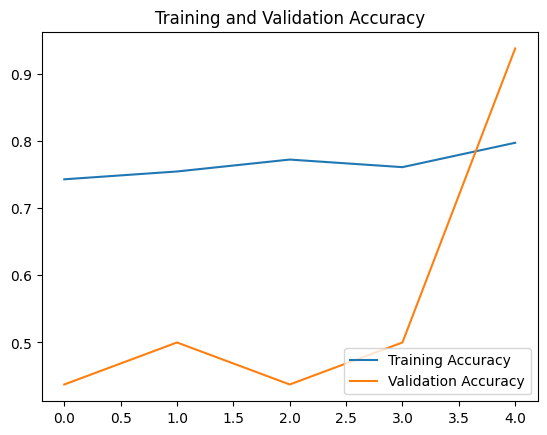

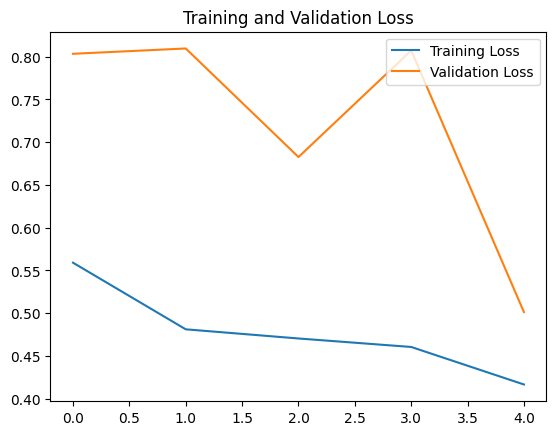

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6538 - loss: 0.6257 
Test accuracy: 0.6490384340286255


In [23]:
# 选择模型
model = create_model_1()  # 选择不同的模型进行训练
# 编译模型
model.compile(optimizer='adam',#优化器
              loss='binary_crossentropy',#损失函数：二分类交叉熵
              metrics=['accuracy'])
# 训练模型
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=eval_generator,
    validation_steps=50
)
# 绘制训练过程中的损失和准确率曲线
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.show()

# 在测试集上评估模型性能
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Test accuracy:', test_acc)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 282ms/step - accuracy: 0.7472 - loss: 0.5011 - val_accuracy: 0.5000 - val_loss: 3.8270
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 250ms/step - accuracy: 0.8482 - loss: 0.3344 - val_accuracy: 0.5000 - val_loss: 6.5895
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 384ms/step - accuracy: 0.8911 - loss: 0.3162 - val_accuracy: 0.5000 - val_loss: 9.4803
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 240ms/step - accuracy: 0.8621 - loss: 0.3339 - val_accuracy: 0.5000 - val_loss: 10.7768
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 386ms/step - accuracy: 0.8774 - loss: 0.2885 - val_accuracy: 0.5000 - val_loss: 9.8506


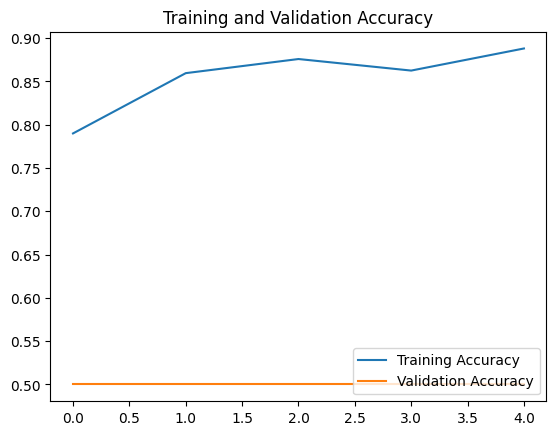

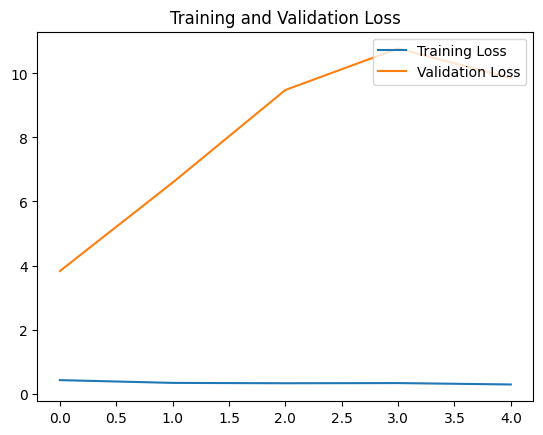

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.6232 - loss: 6.8125 
Test accuracy: 0.625


In [86]:
# 选择模型
model = create_model_2()  # 选择不同的模型进行训练
# 编译模型
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# 训练模型
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=eval_generator,
    validation_steps=50
)
# 绘制训练过程中的损失和准确率曲线
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.show()

# 在测试集上评估模型性能
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Test accuracy:', test_acc)

In [113]:
def create_model_3():
    # 深度更深的模型，增加卷积层
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # layers.Conv2D(512, (3, 3), activation='relu'),
        # layers.Conv2D(512, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 354ms/step - accuracy: 0.7503 - loss: 0.6212 - val_accuracy: 0.5000 - val_loss: 0.7348
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 224ms/step - accuracy: 0.7271 - loss: 0.5407 - val_accuracy: 0.5000 - val_loss: 0.6525
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 349ms/step - accuracy: 0.7896 - loss: 0.4629 - val_accuracy: 0.6875 - val_loss: 0.5524
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.8019 - loss: 0.4067 - val_accuracy: 0.7500 - val_loss: 0.5398
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 364ms/step - accuracy: 0.8392 - loss: 0.3450 - val_accuracy: 0.8125 - val_loss: 0.5965


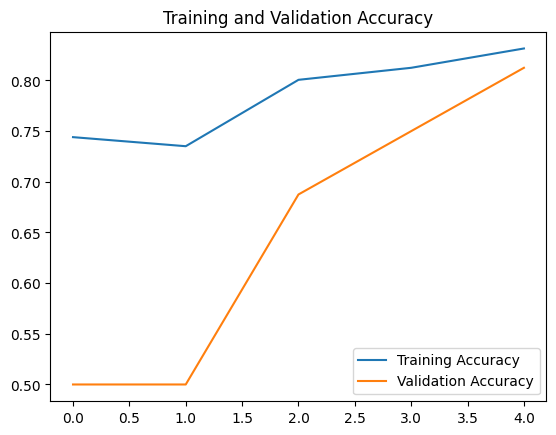

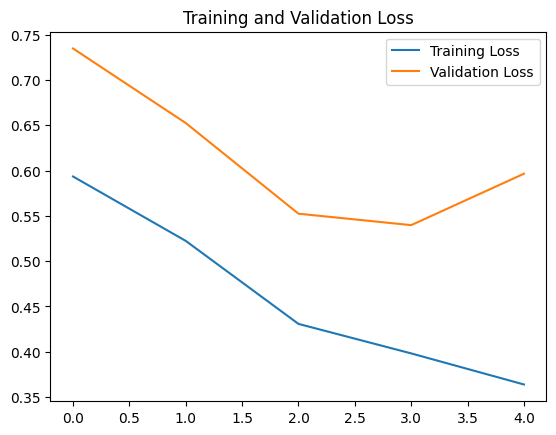

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.7828 - loss: 0.4308 
Test accuracy: 0.7932692170143127


In [114]:
# 选择模型
model = create_model_3()  # 选择不同的模型进行训练
# 编译模型
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# 训练模型
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=eval_generator,
    validation_steps=50
)
# 绘制训练过程中的损失和准确率曲线
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.show()

# 在测试集上评估模型性能
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Test accuracy:', test_acc)